In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    RobustScaler,
    PowerTransformer,
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("fivethirtyeight")

In [2]:
dataset = pd.read_csv("./customer_data.csv")
dataset.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [3]:
loyalty_status = dataset["loyalty_status"]
dataset.drop("loyalty_status", axis=1, inplace=True)
loyalty_status.unique()

array(['Gold', 'Regular', 'Silver'], dtype=object)

In [4]:
dataset.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [5]:
print("Kurtosis Results: \n", dataset.select_dtypes(include="number").kurtosis())

Kurtosis Results: 
 id                   -1.200000
age                  -0.007840
income               -1.200661
purchase_amount      -0.864059
promotion_usage      -1.245328
satisfaction_score   -0.001749
dtype: float64


In [6]:
print("Skew Results: \n", dataset.select_dtypes(include="number").kurtosis())

Skew Results: 
 id                   -1.200000
age                  -0.007840
income               -1.200661
purchase_amount      -0.864059
promotion_usage      -1.245328
satisfaction_score   -0.001749
dtype: float64


In [7]:
categorical_cols = dataset.select_dtypes(include="object").columns
categorical_cols

Index(['gender', 'education', 'region', 'purchase_frequency',
       'product_category'],
      dtype='object')

## Visualizing the Dataset

In [58]:
def plot_relational_graph(x, y):
    """
    Creates a scatter plot visualizing the relationship between two variables in a dataset.

    Args:
        x (str): The name of the first variable (x-axis) in the dataset.
        y (str): The name of the second variable (y-axis) in the dataset.

    Returns:
        None. (The function creates a plot and does not return a value.)
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset[x], dataset[y])
    plt.title(f"Scatter Plot of {y.title()} against {x.title()}")
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.xlim(-np.min(dataset[x]) * 1.5, np.max(dataset[x]) * 1.5)
    plt.savefig(f"figures/scatter{x.lower()}+{y.lower()}.png",  bbox_inches='tight')

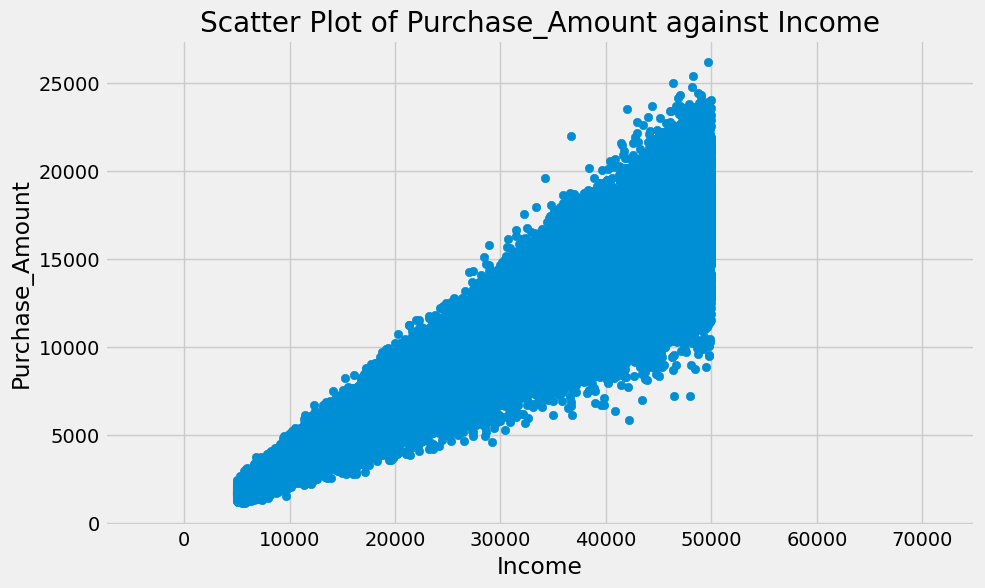

In [59]:
plot_relational_graph("income", "purchase_amount")

In [60]:
def plot_histogram(x):
    """
    Creates a histogram visualizing the distribution of a variable in a dataset.

    Args:
        x (str): The name of the variable to create the histogram for (x-axis).

    Returns:
        None. (The function creates a plot and does not return a value.)
    """
    plt.figure(figsize=(10, 6))
    plt.hist(dataset[x])
    plt.title(f"Histogram of {x.title()}")
    plt.xlabel(x.title())
    plt.ylabel("Frequency")
    plt.legend(["Frequency"])
    plt.savefig("figures/History.png",  bbox_inches='tight')

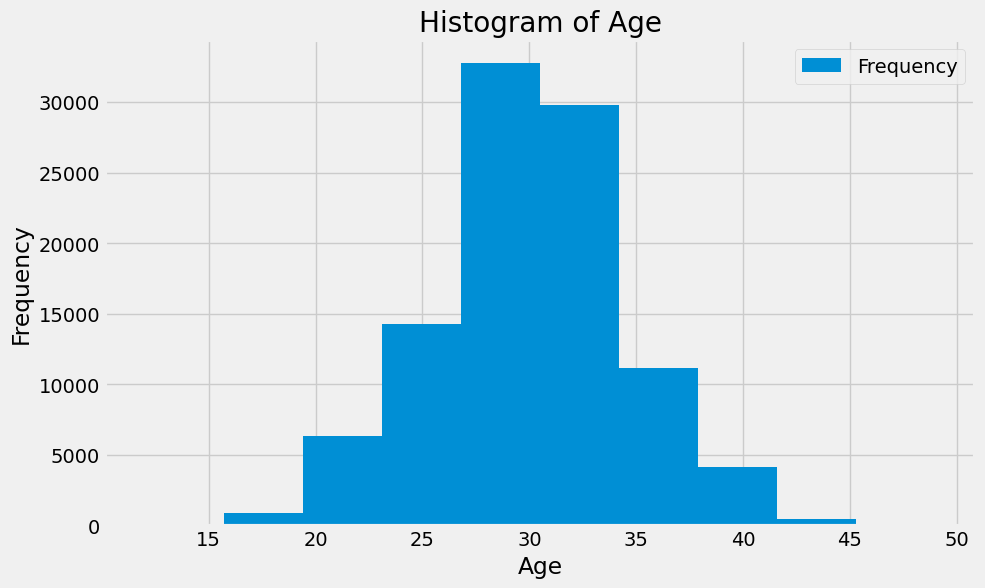

In [61]:
plot_histogram("age")

In [62]:
def plot_bar_chart():
    """
    Creates a bar chart visualizing the distribution of customer loyalty statuses.

    Args:
        loyalty_status (pd.Series): A pandas Series containing customer loyalty statuses.

    Returns:
        None. (The function creates a plot and does not return a value.)
    """
    loyalty_value_counts = loyalty_status.value_counts().to_dict()
    plt.figure(figsize=(10, 6))
    plt.bar(
        loyalty_value_counts.keys(),
        loyalty_value_counts.values(),
        color=["green", "silver", "gold"],
        label=True,
    )
    plt.title("Bar Chart of Customer Loyalty Status")
    plt.xlabel("Loyalty Status")
    plt.ylabel("Frequency")
    plt.savefig("figures/bar.png",  bbox_inches='tight')

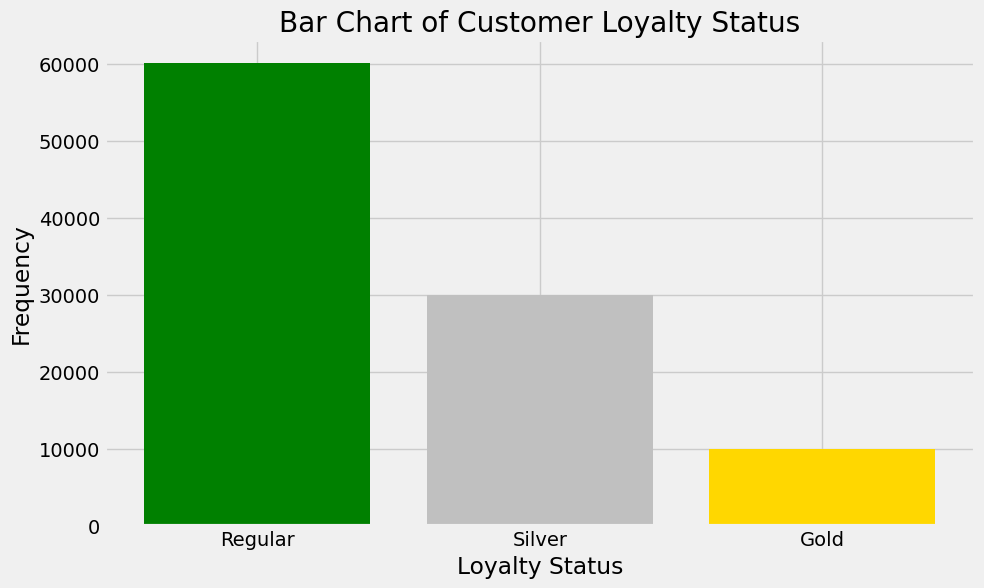

In [63]:
plot_bar_chart()

In [64]:
def plot_heatmap():
    """
    Creates a heatmap visualizing the correlation matrix of numerical features in a dataset.

    Displays a heatmap using Seaborn's heatmap function, highlighting the correlation coefficients
    between all pairs of numerical features in the provided dataset. The color intensity and
    sign of the correlation coefficient indicate the strength and direction of the linear relationship
    between two features.
    """
    plt.figure(figsize=(10, 6))
    num_cols = dataset.select_dtypes(["number"])
    sns.heatmap(num_cols.corr())
    plt.title("Heat Map of the Dataset")
    plt.xlabel("Dataset Features")
    plt.ylabel("Dataset Features")
    plt.savefig("figures/heatmap.png", bbox_inches='tight')

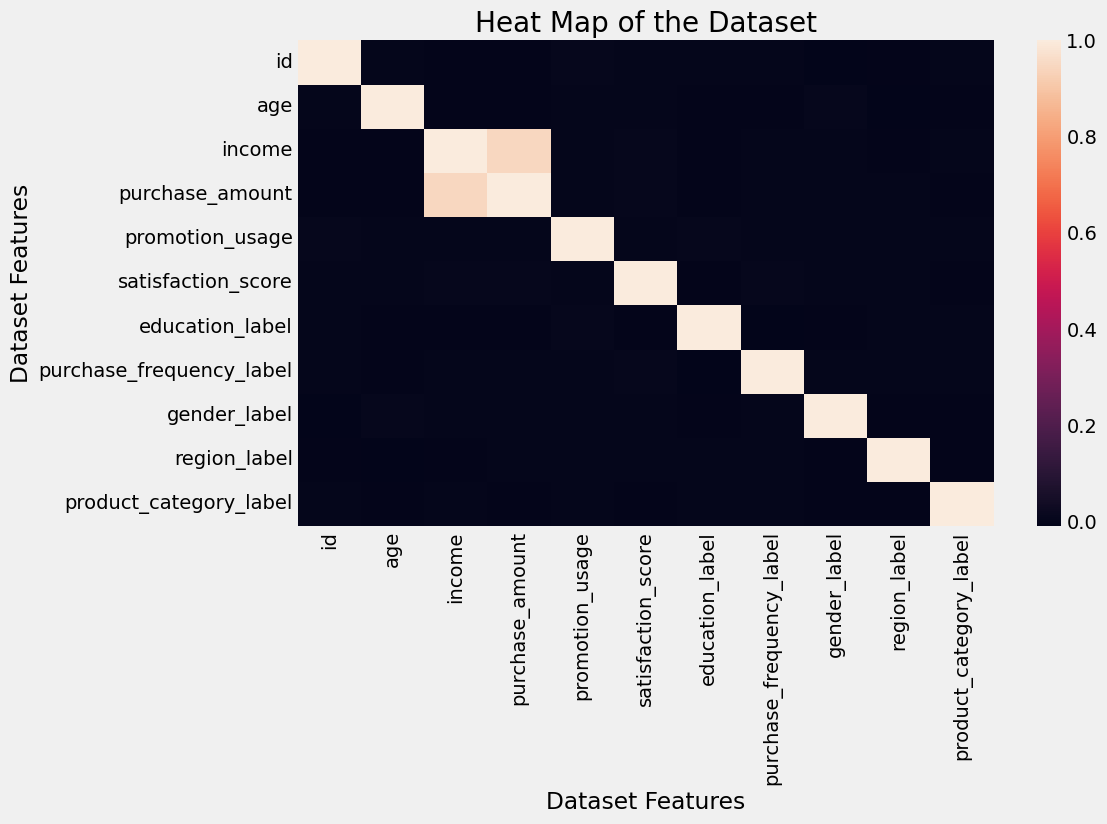

In [65]:
plot_heatmap()

## Encoding Categorical Values
Label Encoding gives a sense of hierachy to category values, which is what we hope to achieve with those values

In [66]:
label_encoded_features = [
    "education",
    "purchase_frequency",
    "gender",
    "region",
    "product_category",
]

# Label Encoding
for feature in label_encoded_features:
    label_encoder = LabelEncoder()
    dataset[f"{feature}_label"] = label_encoder.fit_transform(dataset[feature])

In [67]:
dataset.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score', 'education_label',
       'purchase_frequency_label', 'gender_label', 'region_label',
       'product_category_label'],
      dtype='object')

In [68]:
columns = ["age", "income", "purchase_amount", "promotion_usage", "satisfaction_score"]
label_encoded_columns = [f"{feature}_label" for feature in label_encoded_features]

training_columns = columns + label_encoded_columns
features = dataset[training_columns]

In [69]:
training_columns

['age',
 'income',
 'purchase_amount',
 'promotion_usage',
 'satisfaction_score',
 'education_label',
 'purchase_frequency_label',
 'gender_label',
 'region_label',
 'product_category_label']

## Normalize features

In [70]:
# RobustScaler removes the median and scales the data according to the quantile range
# and is more robust to outliers
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

In [71]:
training_columns

['age',
 'income',
 'purchase_amount',
 'promotion_usage',
 'satisfaction_score',
 'education_label',
 'purchase_frequency_label',
 'gender_label',
 'region_label',
 'product_category_label']

## K-Means fitting and Clustering

### Elbow method

In [77]:
def elbow_cluster_fit():
    """
    Analyzes the optimal number of clusters for k-Means clustering using the Elbow Method.

    Returns:
       list: A list containing the SSE (Sum of Squared Errors) values for each tested number of clusters (k).

    This function helps determine the optimal number of clusters (k) for k-Means clustering using the Elbow Method.
    It iterates through a range of potential k values, performs k-Means clustering for each k, and records
    the corresponding SSE (inertia) value. The Elbow Method suggests choosing the k at which the SSE starts
    to plateau or "elbow" out, indicating a diminishing return on adding more clusters.
    """
    kmeans_kwargs = {
        "init": "random",
        "n_init": "auto",
        "max_iter": 300,
        "random_state": 42,
    }

    # A list holds the SSE values for each k
    k_range = range(1, 10)
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.style.use("fivethirtyeight")
    plt.title("k-Means - Elbow Method")
    plt.plot(k_range, sse)
    plt.xticks(k_range)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.savefig("figures/elbow-method.png", bbox_inches='tight')

    # return sse

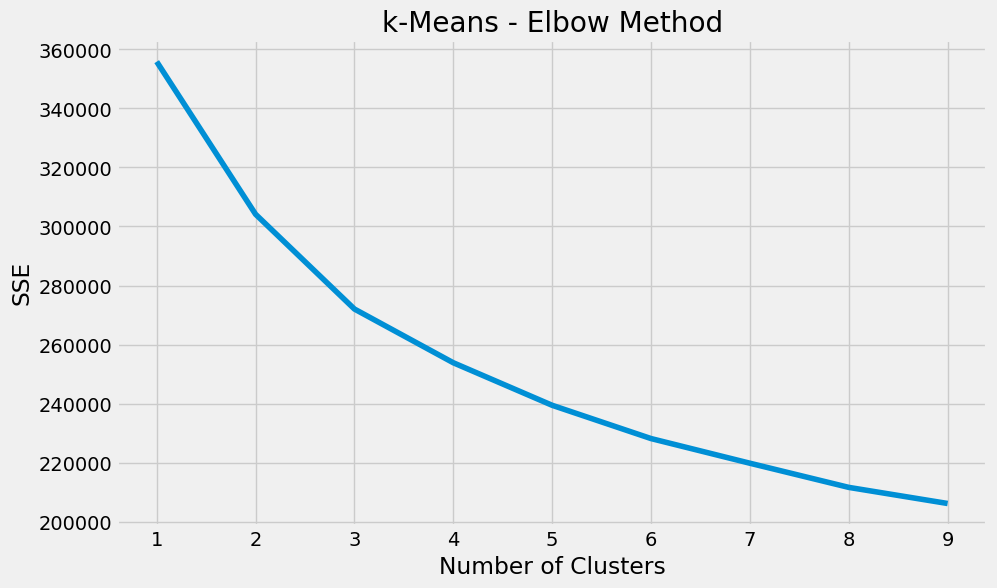

In [78]:
elbow_cluster_fit()

## k-means Silhouette Method

In [75]:
def silhouette_cluster_fit():
    """
    Analyzes the optimal number of clusters for k-Means clustering using the Silhouette Coefficient.


    Returns:
        list: A list containing the Silhouette Coefficient score for each tested number of clusters (k).

    This function helps determine the optimal number of clusters (k) for k-Means clustering using the Silhouette Coefficient.
    It iterates through a range of potential k values, performs k-Means clustering for each k, and calculates the
    corresponding Silhouette Coefficient score. The Silhouette Coefficient measures how well points are clustered
    within their assigned clusters. Higher scores generally indicate better cluster separation.
    """
    kmeans_kwargs = {
        "init": "random",
        "n_init": "auto",
        "max_iter": 300,
        "random_state": 42,
    }
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []
    k_range = range(2, 8)

    # Notice you start at 2 clusters for silhouette coefficient
    for k in k_range:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        print("Calculating silheouette_score for run: ", k)
        score = silhouette_score(scaled_features, kmeans.labels_, n_jobs=-1)
        silhouette_coefficients.append(score)

    plt.style.use("fivethirtyeight")
    plt.title("k-Means - Silhouette Method")
    plt.plot(k_range, silhouette_coefficients)
    plt.xticks(k_range)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silheoutte Score")
    plt.savefig("figures/silheoutte.png", bbox_inches='tight')

    # return silhouette_coefficients

In [ ]:
silhouette_cluster_fit()

### Performing Clustering

In [49]:
def create_cluster_model(k, X):
    """
    Creates and fits a k-Means clustering model.

    Args:
        k (int): The desired number of clusters for the k-Means model.
        X (np.ndarray): A NumPy array containing the data points to be clustered.

    Returns:
        sklearn.cluster.kmeans_.KMeans: A fitted k-Means clustering model.

    This function creates and fits a k-Means clustering model on the provided data (`X`).
    It uses the specified number of clusters (`k`) and sets the initialization method to "random" with a fixed random state (50).
    """
    kmeans = KMeans(init="random", n_clusters=k, random_state=50)
    kmeans.fit(X)
    return kmeans

In [50]:
cluster_train, cluster_test = train_test_split(scaled_features, test_size=0.01)
kmeans = create_cluster_model(2, cluster_train)

In [51]:
labels_pred = kmeans.predict(cluster_test)

In [79]:
def plot_clusters(kmeans, x_feature=0, y_feature=1):
    """
    x_feature: The index of the feature that should be plotted on the x-axis
    y_feature: The index of the feature that should be plotted on the y-axis
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=False)
    fig.suptitle(f"k-means Clustering of Customer Purchase Data", fontsize=16)
    fte_colors = {
        0: "#008fd5",
        1: "#fc4f30",
        2: "#FFBB00",
        3: "#303030",
        4: "#EE82EE",
        5: "#007F0E",
        6: "#909000",
        7: "#101214",
        8: "#101A11",
        9: "#10C224",
    }
    x_name, y_name = features.columns[x_feature], features.columns[y_feature]

    # Known data
    km_colors = [fte_colors[label] for label in kmeans.labels_]
    ax1.scatter(cluster_train[:, x_feature], cluster_train[:, y_feature], c=km_colors)
    ax1.set_title(
        f"Train-set\nMin. SSE={kmeans.inertia_:.2f}\nNo. Iters={kmeans.n_iter_}",
        fontdict={"fontsize": 12},
    )

    # Unknown data
    db_colors = [fte_colors[label] for label in labels_pred]
    ax2.scatter(cluster_test[:, x_feature], cluster_test[:, y_feature], c=db_colors)
    ax2.set_title(f"Test-set (Predicted Values)", fontdict={"fontsize": 12})

    fig.supxlabel(x_name)
    ax1.set_ylabel(y_name)
    plt.subplots_adjust(top=0.825)
    plt.savefig("figures/clusters.png",  bbox_inches='tight')

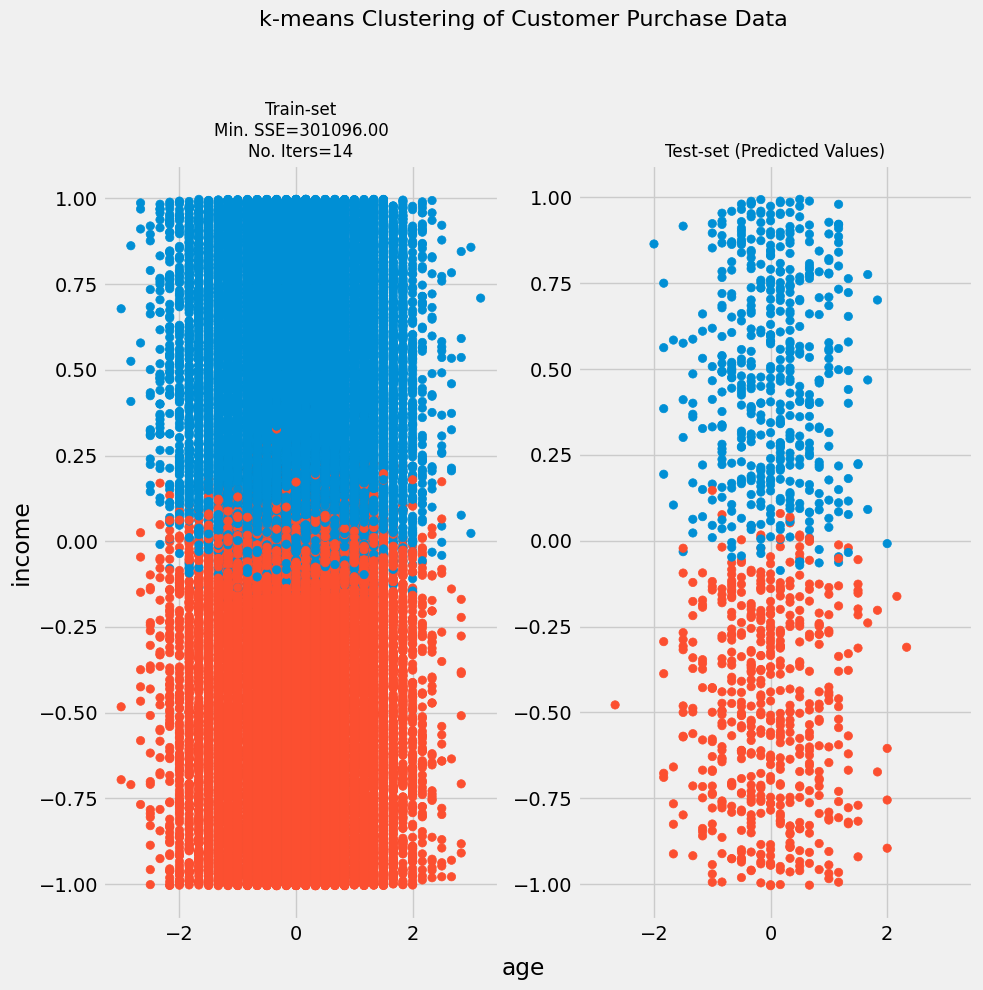

In [80]:
plot_clusters(kmeans, 0, 1)

## Line Fitting

In [54]:
def create_linear_model(X, y):
    """
    Creates and fits a Gradient Boosting Regression model.

    Args:
       X (np.ndarray): A NumPy array containing the features for training.
       y (np.ndarray): A NumPy array containing the target variable for training.

    Returns:
        sklearn.ensemble._gbm.GradientBoostingRegressor: A fitted Gradient Boosting Regression model.
    
    This function creates and fits a Gradient Boosting Regression model to predict a continuous target variable (`y`)
    based on the provided features (`X`). It uses a default number of estimators (100) for the model's ensemble of 
    decision trees.
    """
    gradient_boosting = GradientBoostingRegressor(n_estimators=100)
    gradient_boosting.fit(X, y.ravel())
    return gradient_boosting

In [55]:
X = scaler.fit_transform(features.drop(columns=["income"]))
y = scaler.fit_transform(features[["income"]])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
linear_model = create_linear_model(X_train, y_train)

In [56]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting - MSE: {mse}, R2 Score: {r2}")

Gradient Boosting - MSE: 0.027235685950568533, R2 Score: 0.9182672223191113


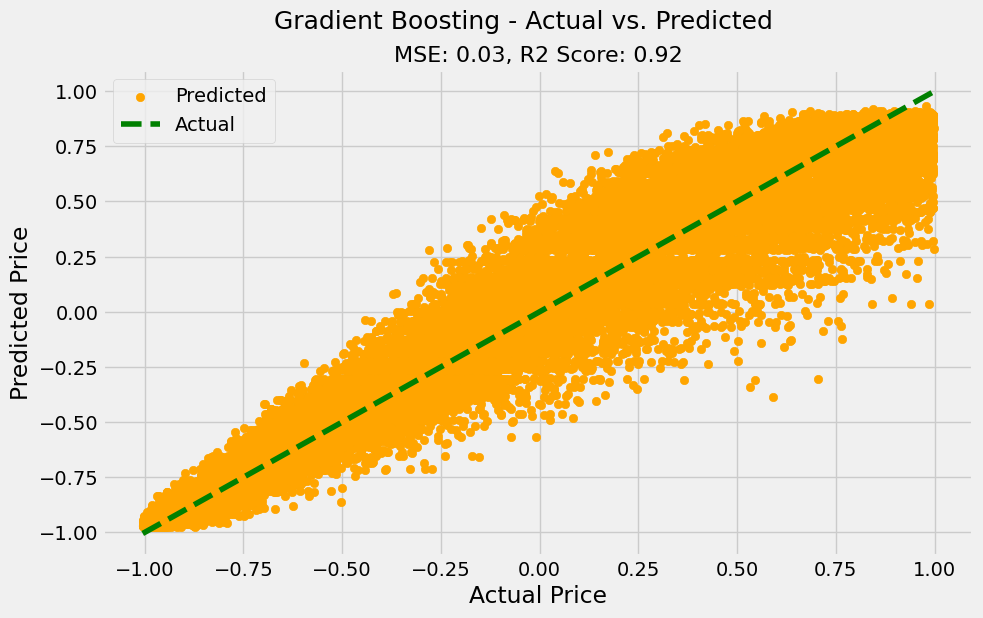

In [82]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="orange", label="Predicted")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="green",
    linestyle="--",
    label="Actual",
)
plt.title(f"MSE: {mse:.2f}, R2 Score: {r2:.2f}", fontsize=16)
plt.suptitle(f"Gradient Boosting - Actual vs. Predicted", fontsize=18)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.savefig('figures/line-fitting.png', bbox_inches='tight')